<a href="https://colab.research.google.com/github/prabindebnath25/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Importing Libraries

In [1]:
# Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import  silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install CatBoost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import time

from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.6 MB/s 


# Loading and inspections

In [2]:
# Loading the data from github
meta_df = pd.read_csv('https://raw.githubusercontent.com/prabindebnath25/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/main/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://github.com/prabindebnath25/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato%20Restaurant%20reviews.csv?raw=true')

## Meta Data

In [3]:
# Get ine first 5 rows of the meta_df
meta_df.head()  

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
# to get the information about meta_df
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [5]:
meta_df.isnull().sum() # Checking null values

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [6]:
meta_df.duplicated().sum() # Check if there is duplicated rows

0

In [7]:
# Getting the 5 point summary of the data
meta_df.describe(include= 'all') 

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [8]:
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [9]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [10]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

## Reviews

In [11]:
# to get the first five rows of the data set 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [12]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [13]:
# checking the number of null values in each columns
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [14]:
# Checking the number of duplicated rows in reviews_df
reviews_df.duplicated().sum()

36

In [15]:
# drop duplicate rows
reviews_df.drop_duplicates(inplace = True)

In [16]:
# Checking the number of duplicated rows in reviews_df after removing duplicates
reviews_df.duplicated().sum()

0

In [17]:
# After revoving the duplicated we check null values
reviews_df.isnull().sum()


Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

Here we can see that almost all the null values are also gone, we now remove the remaining null values

In [18]:
# Removing the null value
reviews_df.dropna(inplace= True)

In [19]:
#checking Value of Rating Columns
reviews_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

Science there is only one row with rating as like we remove the row with rating 'Like' 

In [20]:
# remove the row with rating 'Like'
reviews_df = reviews_df[reviews_df['Rating'] !='Like']

In [21]:
# feature engineering the data
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9954 non-null   object        
 1   Reviewer    9954 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      9954 non-null   object        
 4   Time        9954 non-null   datetime64[ns]
 5   Pictures    9954 non-null   int64         
 6   Reviews     9954 non-null   int64         
 7   Followers   8380 non-null   float64       
 8   Year        9954 non-null   int64         
 9   Month       9954 non-null   int64         
 10  Day         9954 non-null   int64         
 11  Hour        9954 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1011.0+ KB


In [23]:
#checking for null values
reviews_df.isna().sum()

Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1574
Year             0
Month            0
Day              0
Hour             0
dtype: int64

We can see that there are null values in the Followers clumns

In [24]:
# finning the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [25]:
# checking null values in the data set 
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

# EDA

## Meta Data

In [26]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


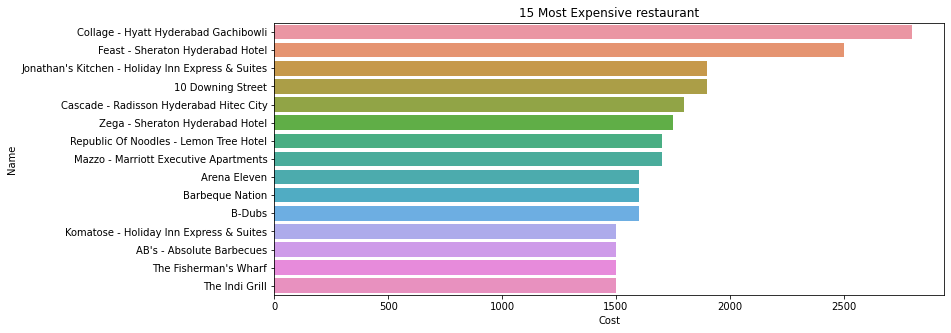

In [27]:
# checking most expencive
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[:15], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Expensive restaurant')
plt.show()

From the figure we can see that the top most expencive resturents is College - Hyatt Hydrabad Gachibowli

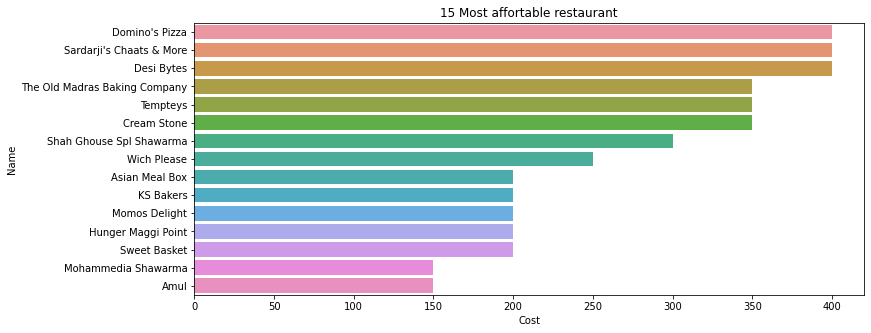

In [28]:
# checking  most afforatble Resturent
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[-15:], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most affortable restaurant')
plt.show()

From the figure we can see that the top most affortable resturents are Amul and Mohammedia Shwarma

In [29]:
meta_df['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [30]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [31]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [32]:
cuis_dict

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 9,
 'North Indian': 61,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Andhra': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

In [33]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'}).sort_values('Number of Restaurants', ascending= False)

In [34]:
cuis_df

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


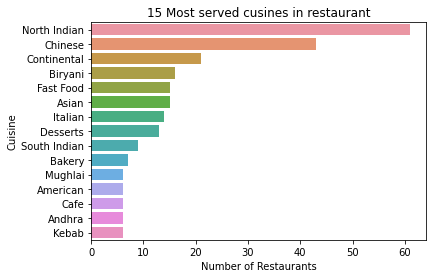

In [35]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


## Reviews

In [36]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [37]:
reviews_df['Restaurant'].value_counts().reset_index().head(10)

,index,Restaurant
0,Beyond Flavours,100
1,KS Bakers,100
2,The Indi Grill,100
3,The Tilt Bar Republic,100
4,Yum Yum Tree - The Arabian Food Court,100
5,Aromas@11SIX,100
6,Komatose - Holiday Inn Express & Suites,100
7,Dine O China,100
8,Shree Santosh Dhaba Family Restaurant,100
9,Prism Club & Kitchen,100


Here we canm see that each resturent has 100 ratings and reviews

In [38]:
reviews_df['Reviewer'].value_counts().reset_index().head(10)

,index,Reviewer
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11
5,Sravani,10
6,Priyanka,10
7,Siva Kumar,10
8,Age Of Foodies (Suraj Karambe),10
9,Manojkumar D Nambisan,10


In [39]:
# Value counts on rating
reviews_df['Rating'].value_counts().reset_index()

,index,Rating
0,5,3826
1,4,2373
2,1,1735
3,3,1192
4,2,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9


In [40]:
# removing the row with rating as Like
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [41]:
# Converting the trating column as float
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

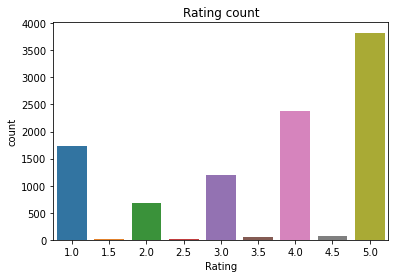

In [42]:
# Plot rating count
sns.countplot(reviews_df.Rating)
plt.title('Rating count')
plt.show()

In [43]:
# Lets find resturent with height abearge rating
restaura_rating_df = pd.DataFrame(reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False))
restaura_rating_df.head()

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


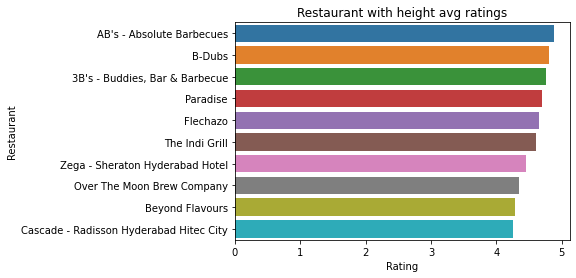

In [44]:
# Restaurant with height avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[:10],
            y = 'Restaurant', 
            x = 'Rating')
plt.title('Restaurant with height avg ratings')
plt.show()

In [45]:
restaura_rating_df.tail()

,Restaurant,Rating
14,Behrouz Biryani,2.825
57,Mathura Vilas,2.820
66,Pakwaan Grand,2.710
10,Asian Meal Box,2.580
41,Hotel Zara Hi-Fi,2.400


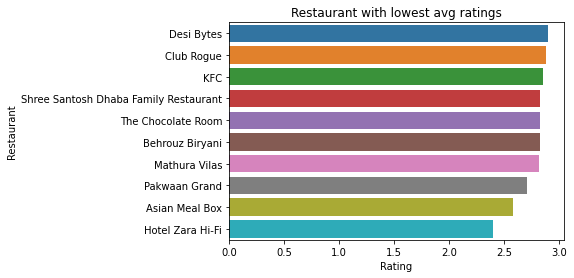

In [46]:
# Restaurant with lowest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[-10:],
            y = 'Restaurant', x = 'Rating')
plt.title('Restaurant with lowest avg ratings')
plt.show()

In [47]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [48]:
# Create a dataframe for the reviewers
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews': 'sum', 'Followers':'sum', 'Rating': 'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 1000)&(df_Reviewer['Reviews']>100)]
most_famous_reviewer

,Reviewer,Reviews,Followers,Rating
39,ASH&B2,294,20793.0,3.333333
56,Aanchal Khemka,945,11605.0,3.600000
62,Aarti Kamath,417,5451.0,4.500000
79,Abc098,665,2275.0,3.000000
115,Abhilash Pradhan (AbTheFoodie),275,4160.0,5.000000
...,...,...,...,...
7291,Vivek Jain,171,1371.0,2.666667
7355,Yash Kumar Singh,486,6836.0,3.500000
7383,Yoga,186,3579.0,4.000000
7403,Yum Yum YUMMY !,534,1212.0,3.500000


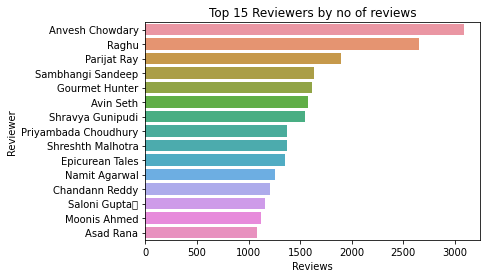

In [49]:
# Top 15 reviewers by review count
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')
plt.show()


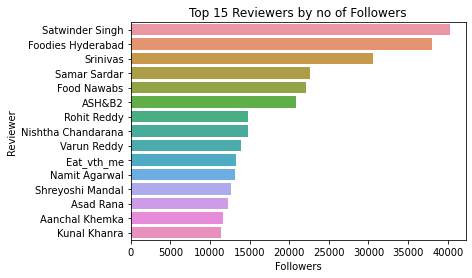

In [50]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')
plt.show()

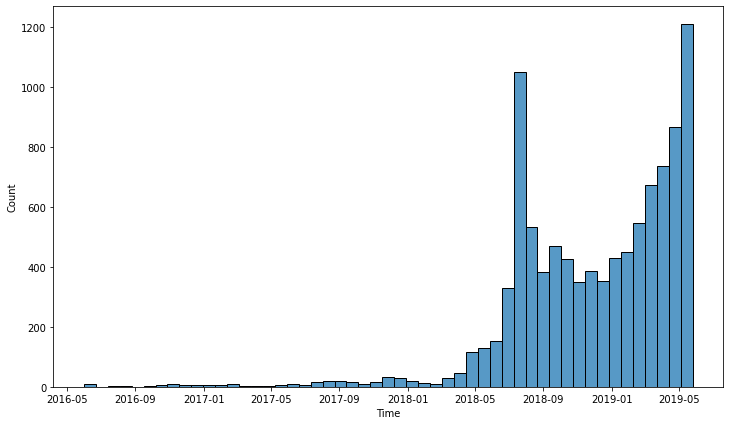

In [51]:
# Hist plot on Time columns
plt.figure(figsize = (12,7))
sns.histplot(reviews_df.Time)
plt.show()

From the hist plot we can see that most of the reviews are recived after the end of year 2018

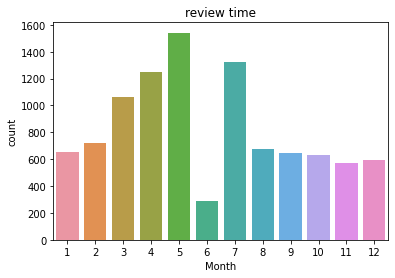

In [52]:
sns.countplot(reviews_df.Month)
plt.title('review time')
plt.show()

# Clustering

In [53]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [54]:
cuisine_df = meta_df[['Name','Cost','Cuisines']]

In [55]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].apply(lambda x: x.lower())

In [56]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."


In [57]:
# spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [58]:
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [59]:
cuisine_df

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[european, kebab, chinese, north indian, conti..."
1,Paradise,800,"biryani, north indian, chinese","[biryani, chinese, north indian]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[desserts, asian, mediterranean, north indian]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[seafood, beverages, biryani, chinese, north i..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[asian, chinese, north indian, continental, me..."
...,...,...,...,...
100,IndiBlaze,600,"fast food, salad","[fast food, salad]"
101,Sweet Basket,200,"bakery, mithai","[bakery, mithai]"
102,Angaara Counts 3,500,"north indian, biryani, chinese","[biryani, chinese, north indian]"
103,Wich Please,250,fast food,[fast food]


In [60]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",continental
...,...,...,...,...
103,Wich Please,250,fast food,fast food
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",thai
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",malaysian
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",chinese


In [61]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [62]:
cuisine_df['cuisine']

0          european
0             kebab
0           chinese
0      north indian
0       continental
           ...     
103       fast food
104            thai
104       malaysian
104         chinese
104           asian
Name: cuisine, Length: 313, dtype: object

## Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [63]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [64]:
l

['Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'Dessert',
 'spicy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'Dessert',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'Dessert',
 'Dessert',
 'fast food',
 'fast food',
 'spicy food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'fast food',
 'spicy food',
 'fast food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'spicy food',
 'fast food',
 '

In [65]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,Healthy food
1,spicy food
2,fast food
3,spicy food
4,spicy food
...,...
308,fast food
309,Healthy food
310,spicy food
311,fast food


In [66]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [67]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)

In [68]:
dataset.head()

,index,Name,Cost,Cuisines,cuisine
0,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food
1,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
2,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",fast food
3,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
4,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food


In [69]:
dataset.drop(['index'],axis=1,inplace=True)

## Making dummies of superset cuisines

In [70]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [71]:
dum_df.head()

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,1,0
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1


In [72]:
cuisine= ['cuisine_Dessert',
        'cuisine_Healthy food',
        'cuisine_spicy food',
         'cuisine_fast food']

In [73]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

In [74]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [75]:
cluster_data.head()

,Cost,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food
0,1900,0,0,2,1
1,450,0,0,1,0
2,1100,0,2,1,0
3,1500,0,2,1,0
4,750,0,1,1,1


## Standardizing each of the features in the clusters

In [76]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cluster_data_sc = sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [-0.81035397, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 0.46989276, -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [ 1.2577369 , -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567,  0.51233992, -0.28787658,  0.26513915],
       [-0.21947087, -0.45323567,  0.51233992,  1.72725951,  0.26513915],
       [-0.51491242, -0.45323567,  1.82442995, -1.29544463,  1.6571197 ],
       [-1.40123708,  2.82881571, -0.79975012, -1.29544463, -1.12684139],
       [-0.71187346, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [ 1.45469793, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567, -0.79975012,  1.72725951,  0.26513915],
       [-1.30275656, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 1.45469793, -0.45323567,  0.51233992, -1.29544463, -1.12684139],
       [-0.31795139, -0.45323567,  1.8

## KMEANS

In [77]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

In [78]:
sse

[525.0,
 382.28792073129756,
 296.33728585144047,
 255.6891416102587,
 224.40381746245993,
 204.40924251424008,
 186.46598790316722,
 165.3634084477609,
 152.3891504884055]

 ## Using Elbow Analysis determining optimal clusters

In [79]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[525.0,
 382.38276523197896,
 296.33728585144047,
 255.47008284906366,
 223.80657276957402,
 200.38467453196128,
 183.44055956381817,
 166.56189493308722,
 153.01105725001048,
 138.4570328430803,
 126.86152831315243,
 120.23020090970726,
 109.7055307655159,
 103.96044367909428]

In [80]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,525.000000
1,2,382.382765
2,3,296.337286
3,4,255.470083
4,5,223.806573
5,6,200.384675
6,7,183.440560
7,8,166.561895
8,9,153.011057
9,10,138.457033


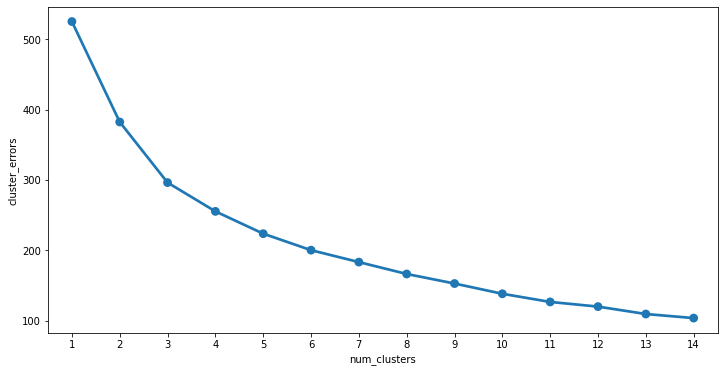

In [81]:
plt.figure(figsize=(12,6))
sns.pointplot(x = clusters_df['num_clusters'], y = clusters_df['cluster_errors'])

##finding best cluster by silhouette score

In [82]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

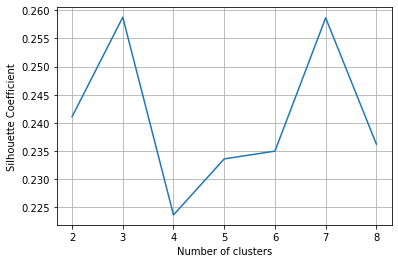

In [83]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [84]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.24120120672756099
For n_clusters = 3 The average silhouette_score is : 0.2587638827511183
For n_clusters = 4 The average silhouette_score is : 0.25126065468048375
For n_clusters = 5 The average silhouette_score is : 0.241859442111404
For n_clusters = 6 The average silhouette_score is : 0.24759701223570293
For n_clusters = 7 The average silhouette_score is : 0.22841677996800727
For n_clusters = 8 The average silhouette_score is : 0.25070228913073606
For n_clusters = 9 The average silhouette_score is : 0.2649698819588144
For n_clusters = 10 The average silhouette_score is : 0.2789398583929923
For n_clusters = 11 The average silhouette_score is : 0.3019211637792847
For n_clusters = 12 The average silhouette_score is : 0.2806234071844735
For n_clusters = 13 The average silhouette_score is : 0.30594226175313266
For n_clusters = 14 The average silhouette_score is : 0.2894544033964166
For n_clusters = 15 The average silhouette_score is : 

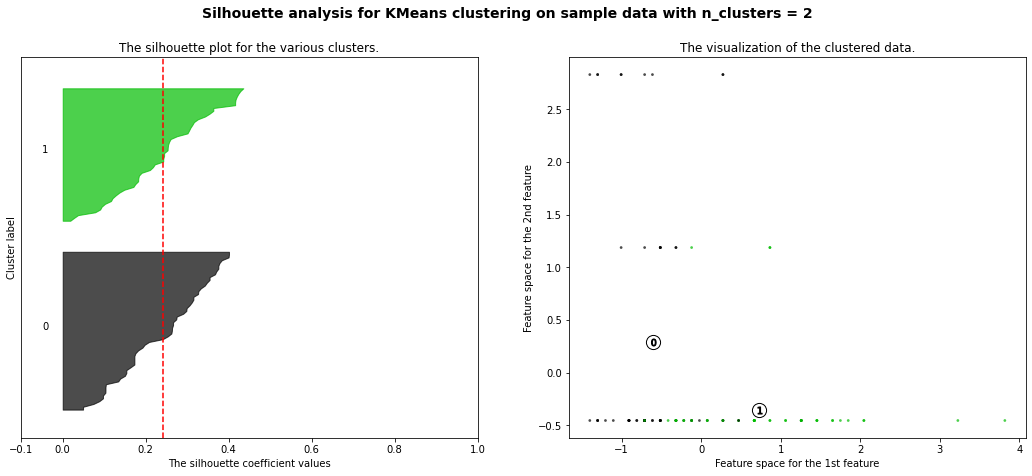

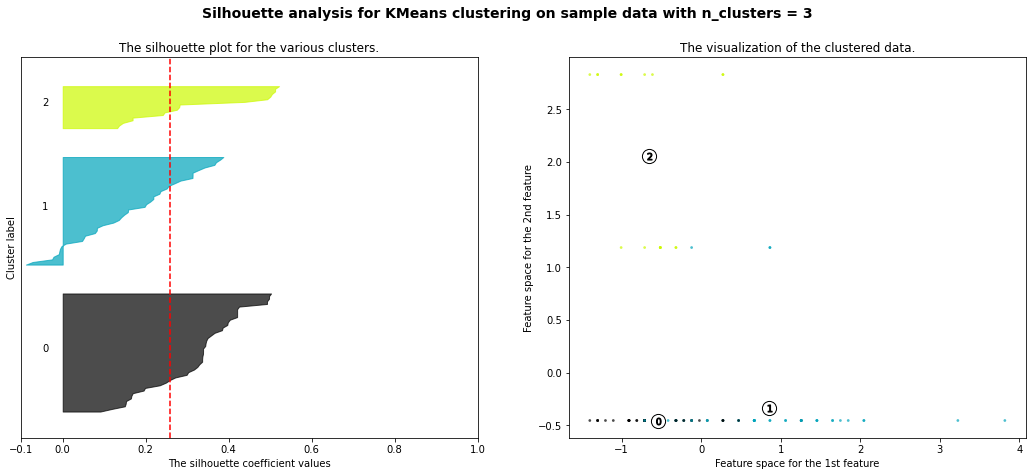

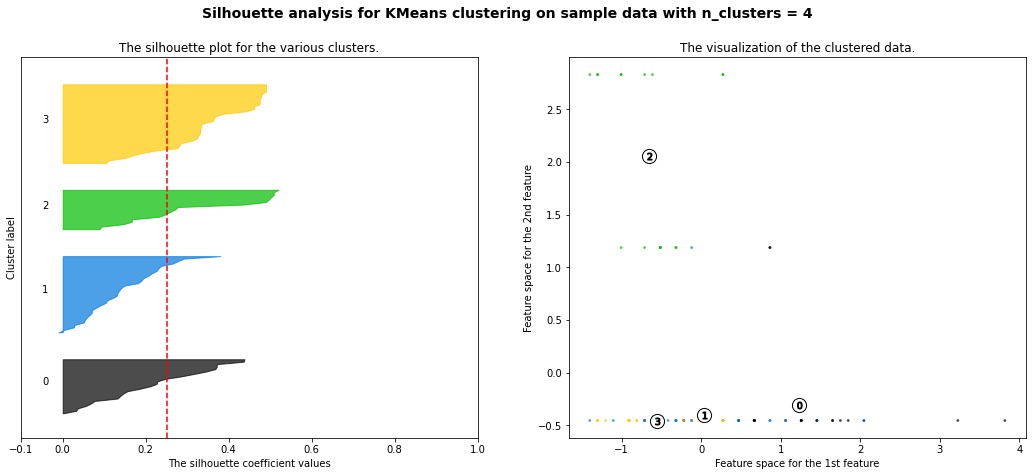

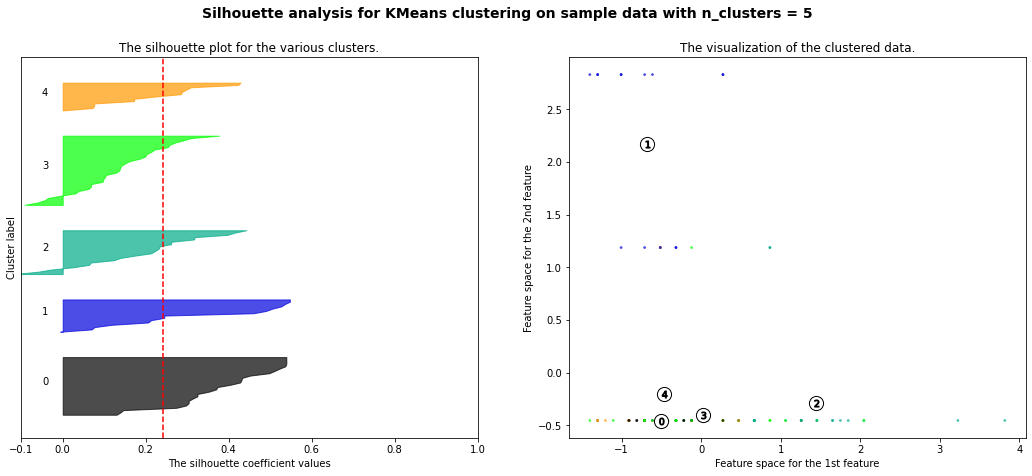

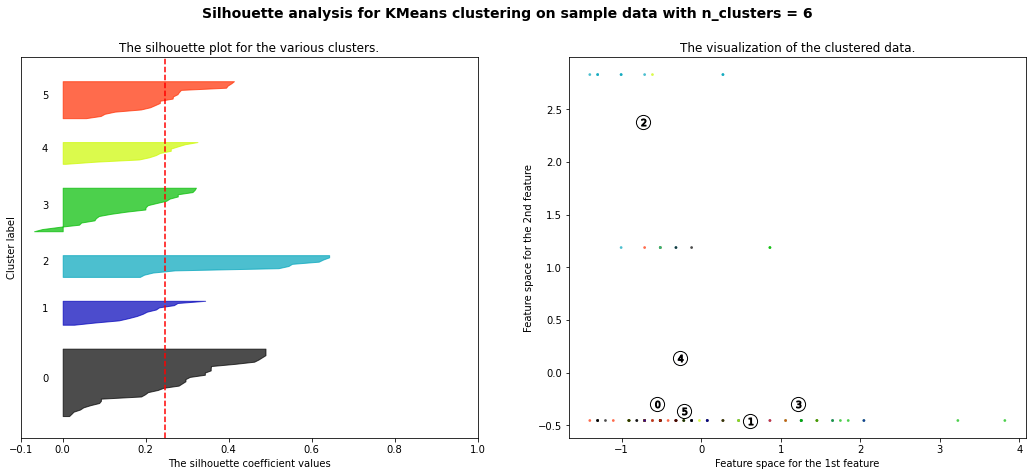

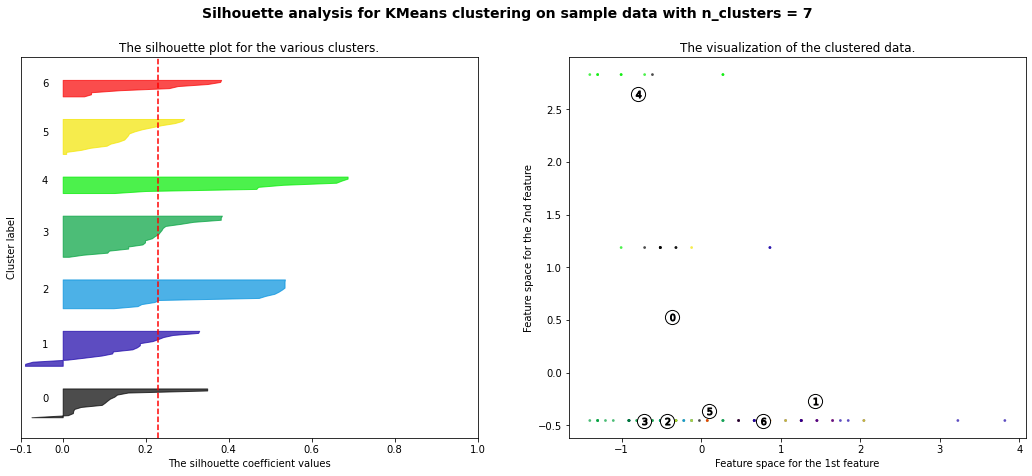

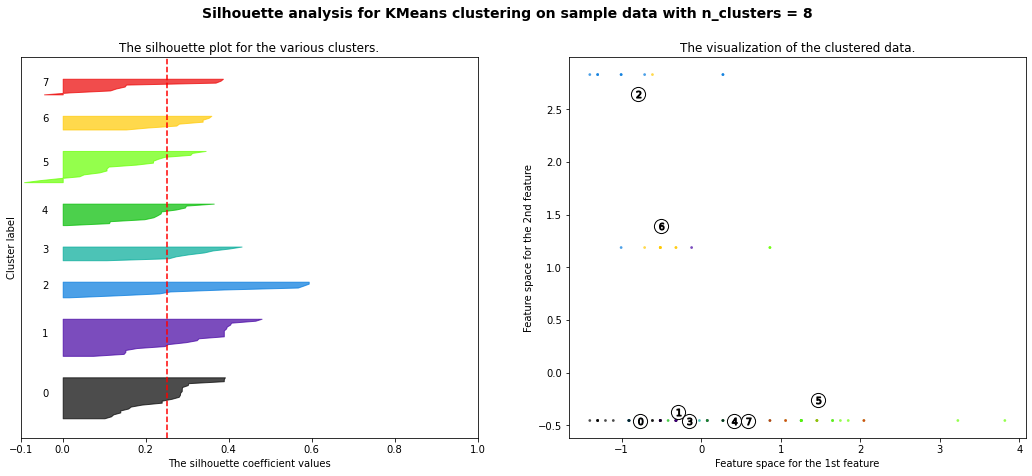

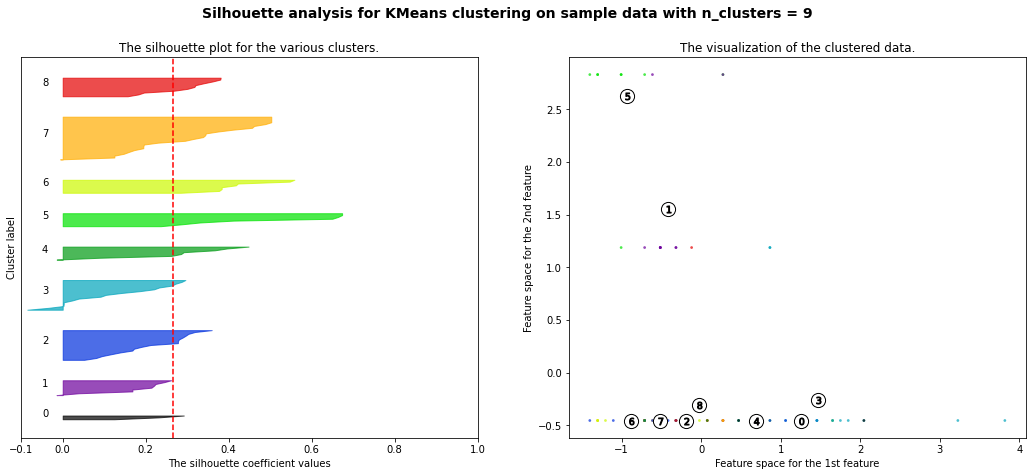

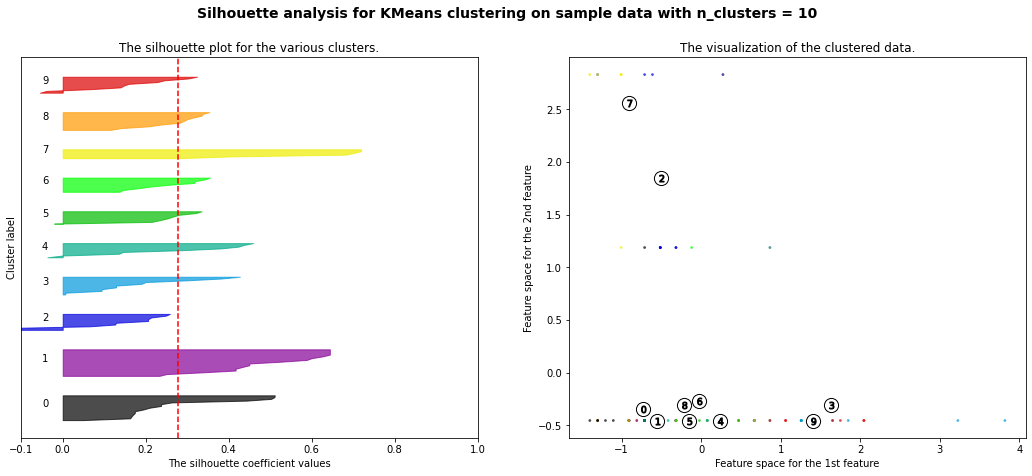

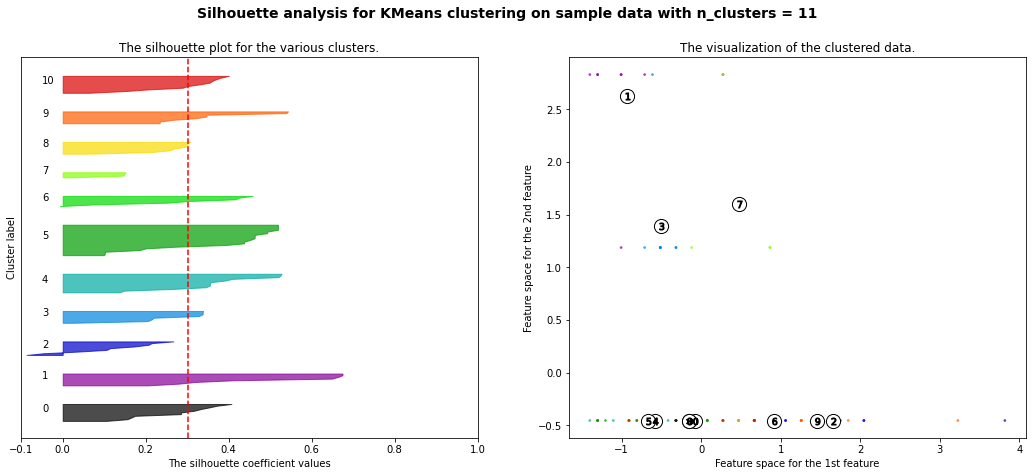

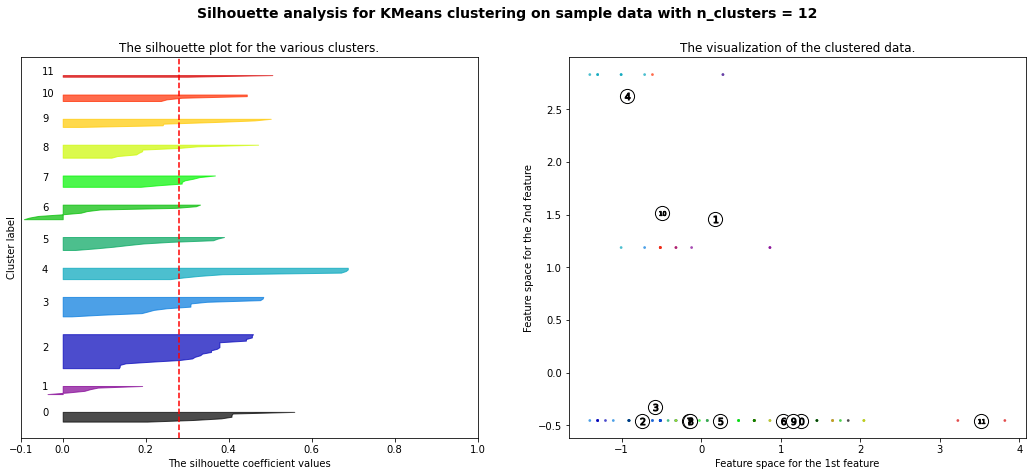

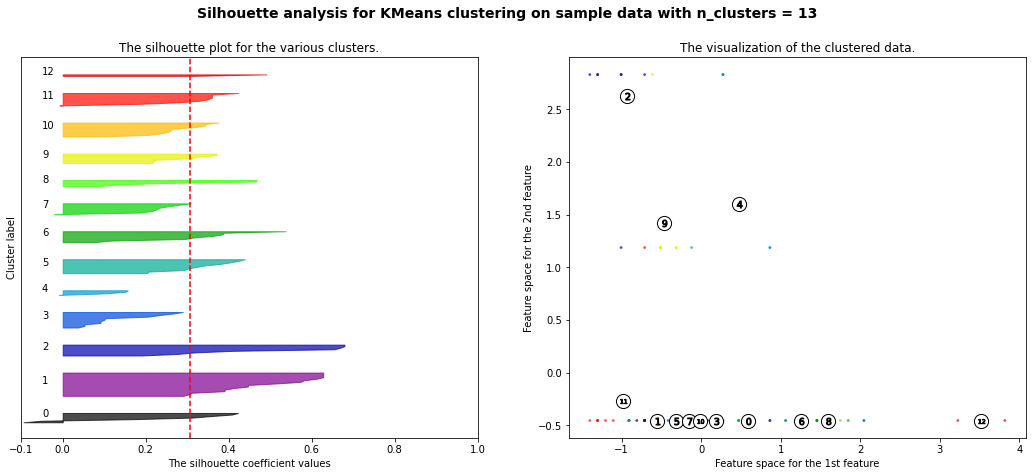

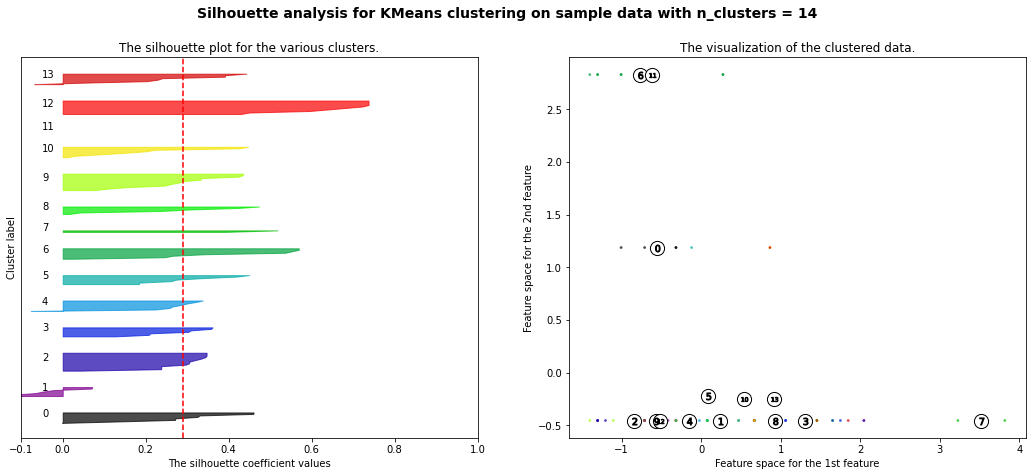

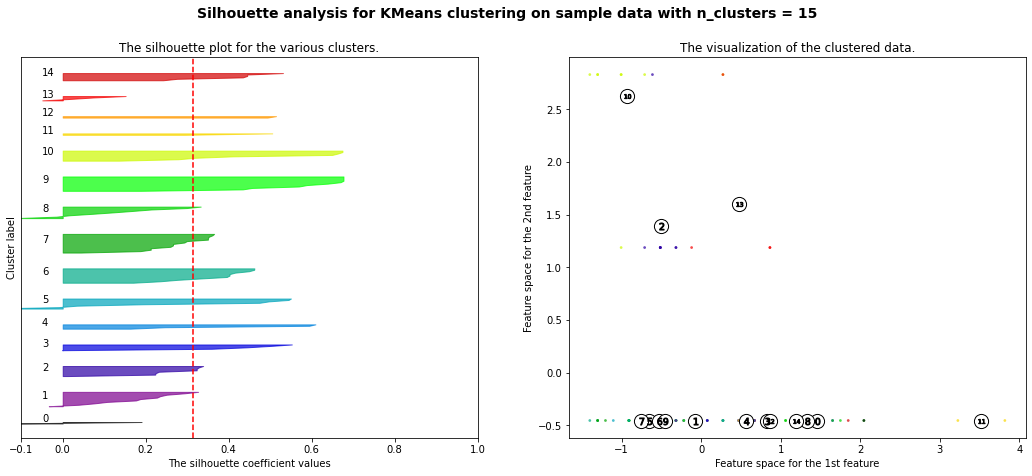

In [85]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From silhouttee coefficients we are getting 3 as our optimum number of clusters

In [86]:
# Finding the predicted values by kmeans
km = KMeans(n_clusters= 3, n_init= 1000, random_state = 1 )
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

In [87]:
pd.Series(km.labels_).value_counts()

1    46
2    42
0    17
dtype: int64

In [88]:
cluster_df['cluster']=y_predicted

In [89]:
cluster_df

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food,cluster
0,10 Downing Street,1900,"north indian, chinese, continental",0,0,2,1,2
1,13 Dhaba,450,north indian,0,0,1,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",0,2,1,0,2
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",0,2,1,0,2
4,Absolute Sizzlers,750,"continental, american, chinese",0,1,1,1,1
...,...,...,...,...,...,...,...,...
100,Wich Please,250,fast food,0,0,0,1,1
101,Yum Yum Tree - The Arabian Food Court,1200,"north indian, hyderabadi",0,0,2,0,2
102,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",0,0,1,1,2
103,Zing's Northeast Kitchen,550,"north eastern, momos",0,1,0,1,1


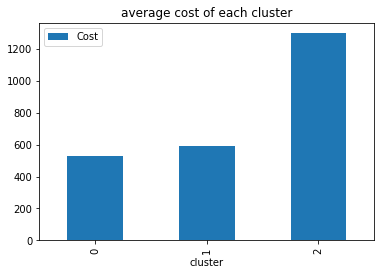

In [90]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()

In [91]:
 cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

,Name,Cost,Cuisines,cluster
0,10 Downing Street,1900,"north indian, chinese, continental",2
1,13 Dhaba,450,north indian,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",2
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",2
4,Absolute Sizzlers,750,"continental, american, chinese",1
5,Al Saba Restaurant,750,"north indian, chinese, seafood, biryani, hyder...",2
6,American Wild Wings,600,"american, fast food, salad, burger",1
7,Amul,150,"ice cream, desserts",0
8,Angaara Counts 3,500,"north indian, biryani, chinese",1
9,Arena Eleven,1600,continental,2


## Herarchical Clustering

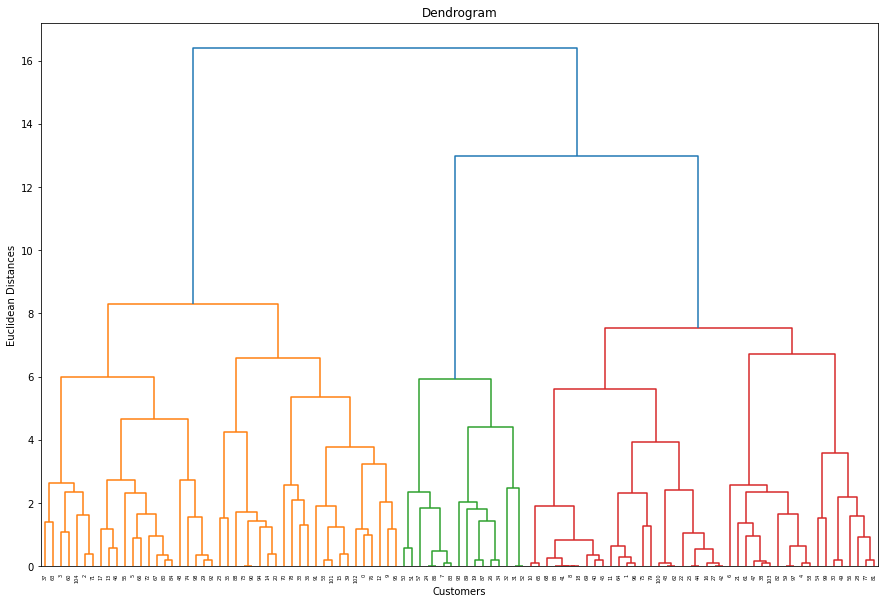

In [92]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize= (15,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line


In [93]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
y_hc = hc.fit_predict(cluster_data_sc)
y_hc

array([0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [94]:
cluster_df['cluster_hr']=y_hc

In [95]:
clustering_result = cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]
clustering_result.head()

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,"north indian, chinese, continental",2,0
1,13 Dhaba,450,north indian,1,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",2,0
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",2,0
4,Absolute Sizzlers,750,"continental, american, chinese",1,1


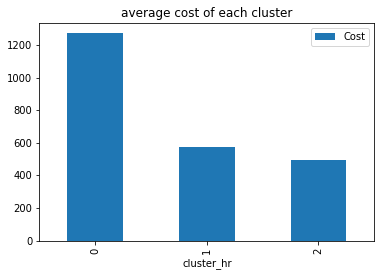

In [96]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster_hr')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()

# Sentiment Analysis

# Text processing

In [97]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [98]:
reviews_df = reviews_df.reset_index(drop= True)

In [99]:
review= reviews_df['Review']
len(review)

9954

In [100]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [101]:
reviews_df['Review'] = reviews_df['Review'].apply(remove_punctuation)

In [102]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)


In [103]:
reviews_df['Review'] = reviews_df['Review'].apply(remove_stopwords)

In [104]:
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [105]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text

In [106]:
review=lemmatization_(review)

In [107]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text


In [108]:
review=remove_spaces(review)

In [109]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text



In [110]:
review=remove_non_leters(review)

In [111]:
len(review)

9954

In [112]:
reviews_df

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,madhumathi mahajan well start nice courteous s...,3.0,2016-06-05 00:08:00,0,53,54.0,2016,6,5,0
9950,Chinese Pavilion,Sharad Agrawal,place never disappoint we food courteous staff...,4.5,2016-06-04 22:01:00,0,2,53.0,2016,6,4,22
9951,Chinese Pavilion,Ramandeep,bad rating mainly chicken bone find veg food a...,1.5,2016-06-03 10:37:00,3,65,423.0,2016,6,3,10
9952,Chinese Pavilion,Nayana Shanbhag,personally love prefer chinese food couple tim...,4.0,2016-05-31 17:22:00,0,13,144.0,2016,5,31,17


In [113]:
# storing the reviews in a feature of df
reviews_df['Review']=review
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [114]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [115]:
#removing words greater than 45 and less than 2
reviews_df['Review']=reviews_df['Review'].apply(lambda x:len_less_than2(x))

In [116]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


# Sentiment Analysis

In [117]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [118]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [119]:
#Create two new columns
reviews_df['Subjectivity'] = reviews_df['Review'].apply(subjectivity)
reviews_df['Polarity'] = reviews_df['Review'].apply(polarity)

In [120]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [121]:
reviews_df['Analysis'] = reviews_df['Polarity'].apply(getAnalysis)

In [122]:
# plot the polarity and subjectivity
fig = px.scatter(reviews_df, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

The x-axis shows polarity, and y-axis shows subjectivity. Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is

In [123]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [124]:
reviews_df['Analysis']=reviews_df['Analysis'].apply(lambda x:sentiment(x))

In [125]:
sentiment_df= reviews_df[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [126]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [128]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

## LogisticRegression

In [129]:
from sklearn.linear_model import LogisticRegression
# creating MultinomialNB model
model = LogisticRegression()

#training the model
model.fit(X_train,y_train)

#predicting the values of y from x via model
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [130]:
# Creating function to find eveluation matrics
model_eveluation_metrices =[]
def model_details(y_train, y_test, y_pred_train, y_pred_test, Model_name):
    working_model ={}
    working_model['name'] = Model_name

    # Accuracy
    print('-'*50)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    print('Train accuracy is:',train_accuracy)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    print('Test accuracy is:',test_accuracy)
    print('-'*50)
    confusion_mat = confusion_matrix(y_pred_test, y_test)
    print("The confusion matrix on the test data is :")
    print(confusion_mat)
    print('-'*50)
    classification_rep= classification_report(y_pred_test, y_test)

    print("The classification report on the train data is :")
    print(classification_rep)

    working_model["Train_accuracy_score"] = accuracy_score(y_train,y_pred_train)
    working_model["Test_accuracy_score"] = accuracy_score(y_test, y_pred_test)
    working_model["Train_f1_score"] = f1_score(y_train, y_pred_train)
    working_model["Test_f1_score"] = f1_score(y_test, y_pred_test)
    # working_model["Train_recall_score"] = recall_score(y_train,y_pred_train)
    # working_model["Test_recall_score"] = recall_score(y_test, y_pred_test)
    working_model["Train_roc_auc_score"] = roc_auc_score(y_train,y_pred_train)
    working_model["Test_roc_auc_score"] = roc_auc_score(y_test, y_pred_test)
    model_eveluation_metrices.append(working_model)


In [131]:
pd.DataFrame(model_eveluation_metrices)

""


In [132]:
model_details(y_train, y_test, y_pred_train, y_pred_test, 'LogisticRegression')

--------------------------------------------------
Train accuracy is: 0.9469524447421299
Test accuracy is: 0.9228605865809562
--------------------------------------------------
The confusion matrix on the test data is :
[[1989  163]
 [  29  308]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2152
           1       0.65      0.91      0.76       337

    accuracy                           0.92      2489
   macro avg       0.82      0.92      0.86      2489
weighted avg       0.94      0.92      0.93      2489



## Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [134]:
rf= RandomForestClassifier()

In [135]:
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [136]:
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [137]:
random_y_pred_train=rfc.predict(X_train)
random_y_pred_test=rfc.predict(X_test)

In [138]:
model_details(y_train, y_test, random_y_pred_train, random_y_pred_test, 'RandomForestClassifier')

--------------------------------------------------
Train accuracy is: 0.8174146014735432
Test accuracy is: 0.8119726797910808
--------------------------------------------------
The confusion matrix on the test data is :
[[2018  468]
 [   0    3]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2486
           1       0.01      1.00      0.01         3

    accuracy                           0.81      2489
   macro avg       0.50      0.91      0.45      2489
weighted avg       1.00      0.81      0.90      2489



In [139]:
pd.DataFrame(model_eveluation_metrices)

,name,Train_accuracy_score,Test_accuracy_score,Train_f1_score,Test_f1_score,Train_roc_auc_score,Test_roc_auc_score
0,LogisticRegression,0.946952,0.922861,0.841219,0.762376,0.868733,0.819779
1,RandomForestClassifier,0.817415,0.811973,0.067077,0.012658,0.517351,0.503185


## XGB Classifier

In [140]:
from xgboost import XGBClassifier

In [141]:
xgbc=XGBClassifier()

In [142]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [143]:
xgbc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

In [144]:
xgb_y_pred_train=xgbc_grid.predict(X_train)
xgb_y_pred_test=xgbc_grid.predict(X_test)

In [145]:
model_details(y_train, y_test, xgb_y_pred_train, xgb_y_pred_test, 'XGBClassifier')

--------------------------------------------------
Train accuracy is: 0.9955793703951775
Test accuracy is: 0.9321012454801125
--------------------------------------------------
The confusion matrix on the test data is :
[[1962  113]
 [  56  358]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2075
           1       0.76      0.86      0.81       414

    accuracy                           0.93      2489
   macro avg       0.87      0.91      0.88      2489
weighted avg       0.94      0.93      0.93      2489



In [146]:
pd.DataFrame(model_eveluation_metrices)

,name,Train_accuracy_score,Test_accuracy_score,Train_f1_score,Test_f1_score,Train_roc_auc_score,Test_roc_auc_score
0,LogisticRegression,0.946952,0.922861,0.841219,0.762376,0.868733,0.819779
1,RandomForestClassifier,0.817415,0.811973,0.067077,0.012658,0.517351,0.503185
2,XGBClassifier,0.995579,0.932101,0.988185,0.809040,0.988586,0.866167


# Conclusion


* We got best cluster as 3 in K-Means and Hairerchial Clustering
* We plot polarity and subjectivity plot for sentiment analysis, Polarity tells how positive or negative the text is. The subjectivity tells how subjective or opinionated the text is
* For sentiment analysis we used supervised techniques. 
* We got the best model as XGBClassifier classifier.

